In [166]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error

In [167]:
dataset = pd.read_csv('real-gdp-per-capita.csv', index_col='Year', parse_dates=['Year'])


In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1950-01-01 to 2004-01-01
Data columns (total 2 columns):
Philippines    55 non-null float64
Thailand       55 non-null float64
dtypes: float64(2)
memory usage: 1.3 KB


In [169]:
dataset = dataset.drop(columns=['Philippines'])

In [170]:
training_set = dataset[:'1988'].iloc[:,:].values
test_set = dataset['1988':].iloc[:,:].values

In [171]:
len(training_set)

39

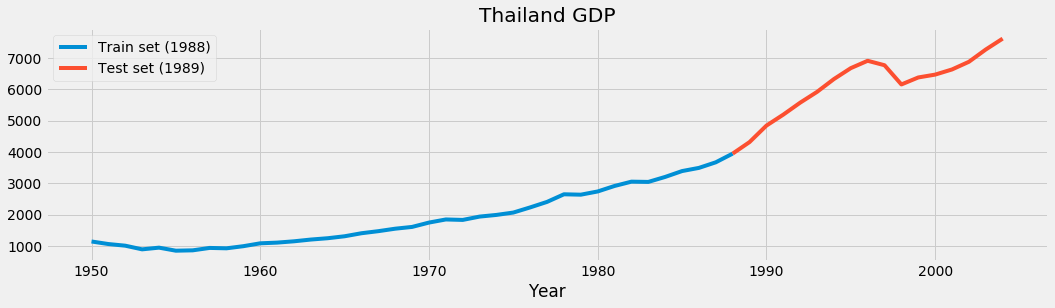

In [172]:
dataset['Thailand'][:'1988'].plot(figsize=(16,4), legend = True)
dataset['Thailand']['1988':].plot(figsize=(16,4), legend = True)
plt.legend(['Train set (1988)','Test set (1989)'])
plt.title('Thailand GDP')
plt.show()

In [173]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [174]:
X_train_th = []
y_train_th = []
for i in range(2,len(training_set)):
    X_train_th.append(training_set_scaled[i-2:i,0])
    y_train_th.append(training_set_scaled[i,0])                      
X_train_th, y_train_th = np.array(X_train_th), np.array(y_train_th)

In [175]:
X_train_th = np.reshape(X_train_th,(X_train_th.shape[0], X_train_th.shape[1],1))


In [176]:
X_train_th.shape

(37, 2, 1)

In [177]:
#The LSTM
reg_th = Sequential()
reg_th.add(LSTM(units=3, input_shape=(X_train_th.shape[1],1)))
reg_th.add(Dropout(0.2))
reg_th.add(Dense(units=1))

reg_th.compile(optimizer = 'rmsprop', loss='mean_squared_error')
reg_th.fit(X_train_th,y_train_th, epochs=100)

Epoch 1/100
37/37 [==============================] - 3s 81ms/step - loss: 0.2005
Epoch 2/100
37/37 [==============================] - 0s 404us/step - loss: 0.1991
Epoch 3/100
37/37 [==============================] - 0s 296us/step - loss: 0.1974
Epoch 4/100
37/37 [==============================] - 0s 404us/step - loss: 0.2101
Epoch 5/100
37/37 [==============================] - 0s 377us/step - loss: 0.1842
Epoch 6/100
37/37 [==============================] - 0s 243us/step - loss: 0.1711
Epoch 7/100
37/37 [==============================] - 0s 243us/step - loss: 0.1900
Epoch 8/100
37/37 [==============================] - 0s 350us/step - loss: 0.1710
Epoch 9/100
37/37 [==============================] - 0s 297us/step - loss: 0.1730
Epoch 10/100
37/37 [==============================] - 0s 270us/step - loss: 0.1691
Epoch 11/100
37/37 [==============================] - 0s 270us/step - loss: 0.1607
Epoch 12/100
37/37 [==============================] - 0s 323us/step - loss: 0.1631
Epoch 13/100
3

37/37 [==============================] - 0s 270us/step - loss: 0.0564
Epoch 100/100
37/37 [==============================] - 0s 243us/step - loss: 0.0624


In [178]:
dataset_total_th = pd.concat((dataset[:'1988'],dataset['1988':]), axis = 0)
inputs_th = dataset_total_th[(len(dataset_total_th)-len(test_set)-2):].values
inputs_th = inputs_th.reshape(-1,1)
inputs_th = sc.transform(inputs_th)
inputs_th.shape
                        

(19, 1)

In [179]:
X_test_th = []

for i in range(2,len(test_set)): 
    X_test_th.append(inputs_th[i-2:i,0])                   
X_test_th = np.array(X_test_th)
X_test_th = np.reshape(X_test_th,(X_test_th.shape[0], X_test_th.shape[1],1))

In [180]:
predicted_GDP = reg_th.predict(X_test_th)
predicted_GDP = sc.inverse_transform(predicted_GDP)

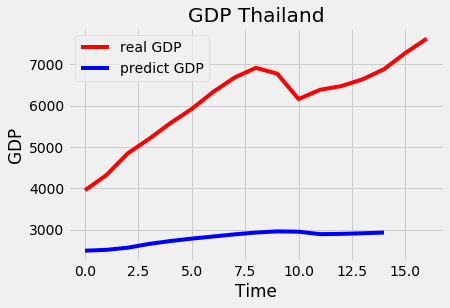

In [181]:
plt.plot(test_set, color = 'red', label = 'real GDP')
plt.plot(predicted_GDP, color = 'blue', label = 'predict GDP')
plt.title('GDP Thailand')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()